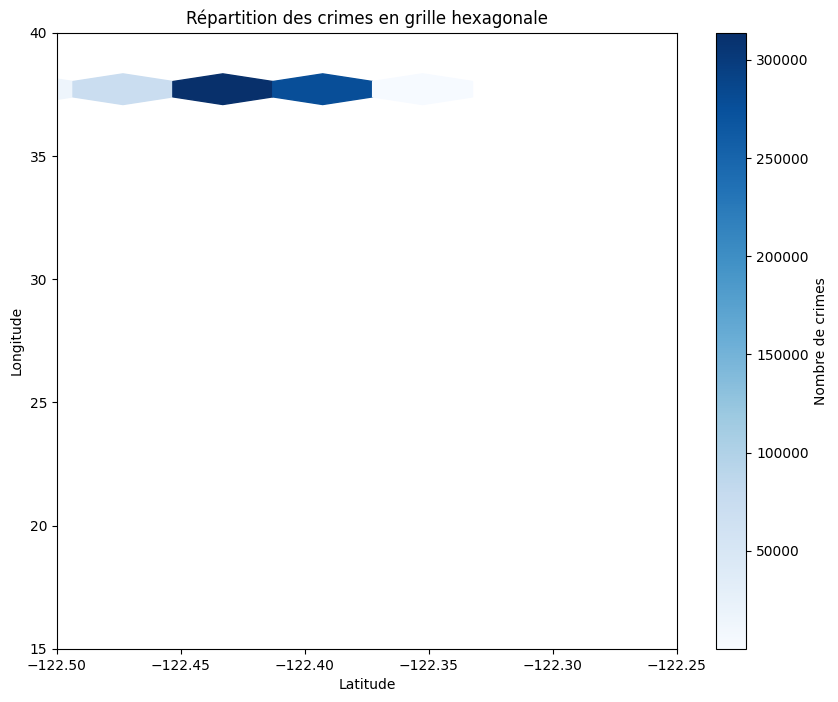

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("Competition_Dataset.csv")

# Créer la figure
plt.figure(figsize=(10, 8))

# Hexbin plot
hb = plt.hexbin(
    x=data["Latitude (Y)"],
    y=data["Longitude (X)"],
    # Ajuste la résolution de la grille (augmenter pour plus de détails)
    gridsize=50,
    cmap="Blues",  # Palette de couleurs
    mincnt=1  # Ignore les cellules vides
)

# Ajouter une barre de couleur
plt.colorbar(hb, label="Nombre de crimes")

# Ajuster les axes
plt.xlim(-122.5, -122.25)
plt.ylim(15, 40)

# Ajouter des labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Répartition des crimes en grille hexagonale")

# Afficher le graphique
plt.show()


In [ ]:
#To create a heatmap, we use folium.plugins.HeatMap(). This shows the density of crime in different areas of the city,
# where red areas have relatively more criminal incidents.


import pandas as pd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
data = pd.read_csv("Competition_Dataset.csv")
crime_map = folium.Map(location=[data["Latitude (Y)"].mean(), data["Longitude (X)"].mean()], zoom_start=12)
HeatMap(data=data[['Latitude (Y)', 'Longitude (X)']], radius=100).add_to(crime_map)
# Identifier les épicentres des crimes (zones les plus impactées)
epicenters = data.groupby(["Latitude (Y)", "Longitude (X)"]).size().reset_index(name="count")
epicenters = epicenters.sort_values(by="count", ascending=False).head(20)  # Top 5 des zones les plus criminogènes

# Ajouter des marqueurs pour les épicentres
for _, row in epicenters.iterrows():
    Marker(
        location=[row["Latitude (Y)"], row["Longitude (X)"]],
        popup=f"""
            <b>Crime Epicenter</b><br>
            <b>Cases:</b> {row['count']}<br>
            <b>Coordinates:</b> ({row["Latitude (Y)"]}, {row["Longitude (X)"]})
        """,
        icon=folium.Icon(color="darkred", icon="exclamation-triangle")
    ).add_to(crime_map)
crime_map


Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'Latitude (Y)', 'Longitude (X)'],
      dtype='object')


KeyError: 'PdDistrict'